Bike Sharing Assignment

Problem Statement : A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic finding it hard to sustain . Company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Goal : Identify the factors affecting the demand for these shared bikes in the American market . 
The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

# Step 1 : Reading, Data cleaning, understanding and visualization of data

# cnt is the target Variable

In [52]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

# import libs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Read the data
bike = pd.read_csv("day.csv")
bike.head()

# cnt is the target Variable

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
bike.describe()
# Describe Summary : All the count shows 730 so NO data missing 
# Mean and Median are within range so No Outlier seen in the data 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [54]:
bike.info()

# info Summary ,
# Missing and Invalid Value Checks : There are 730 entries so no data missing 
# All the 730 entries doesn't have any NaN and have proper values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [55]:
# Overall there are total 730 rows and 16 columns
bike.shape

(730, 16)

<Figure size 1440x1080 with 0 Axes>

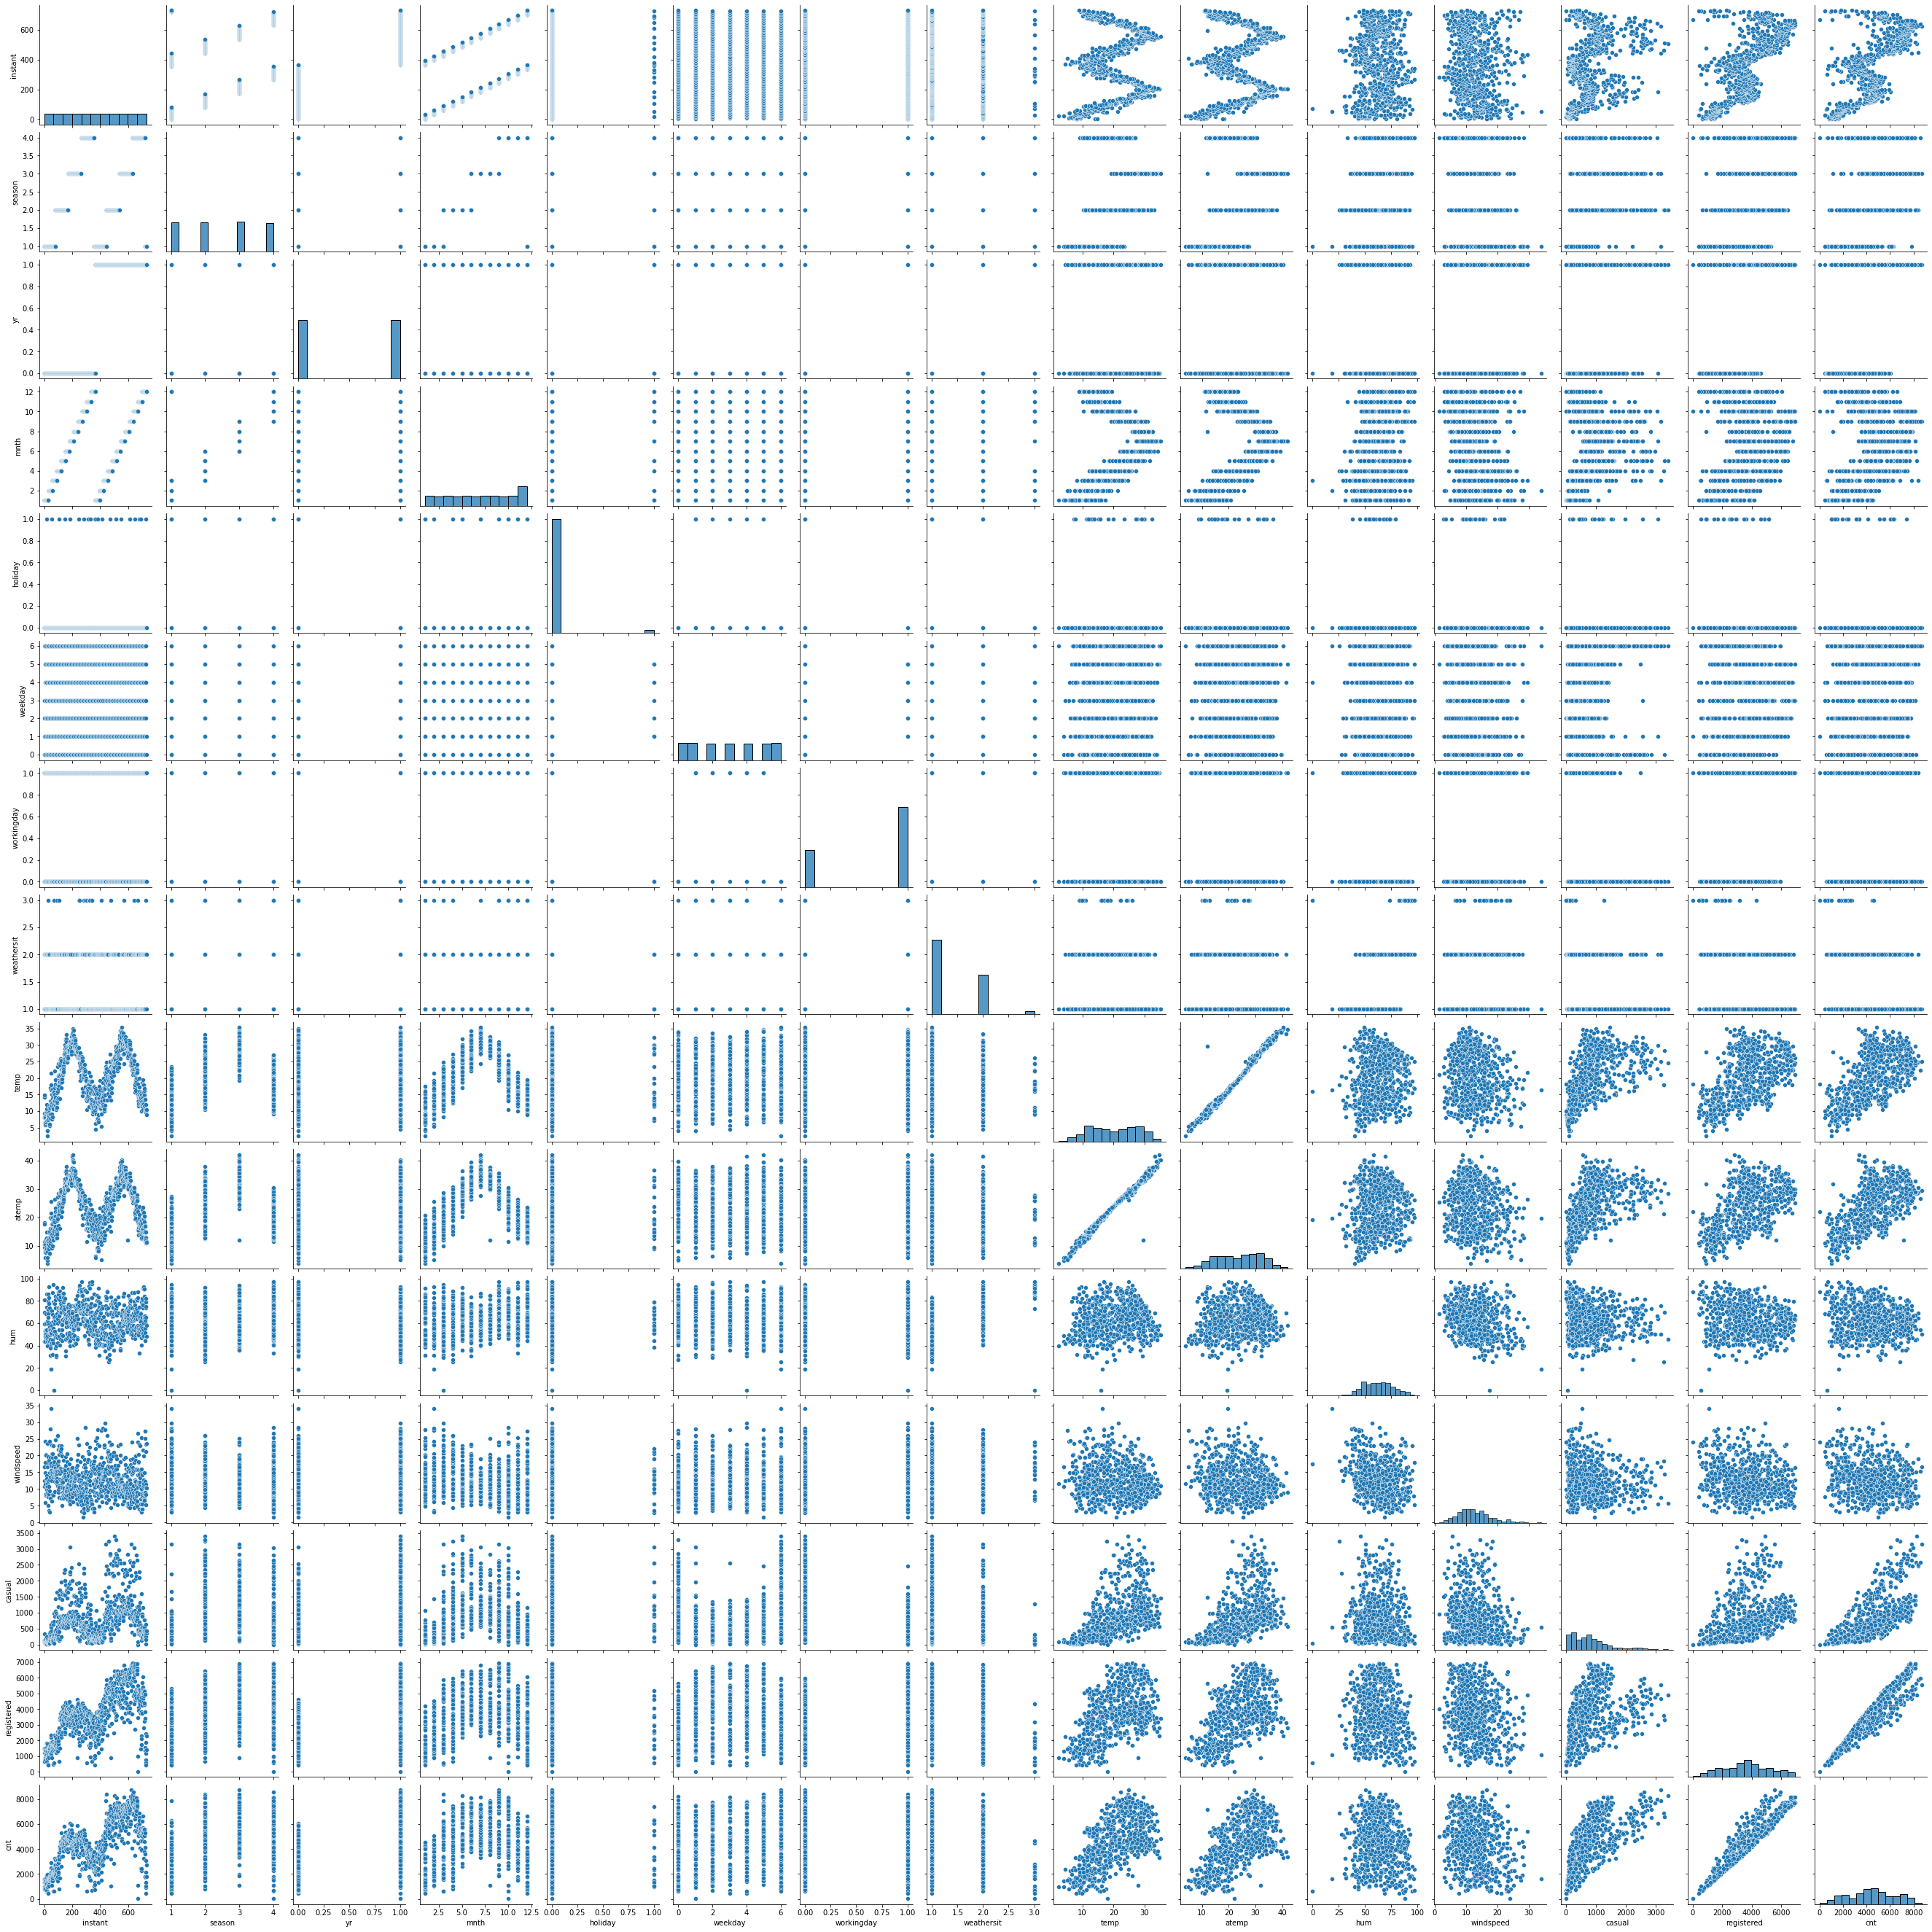

In [56]:
# Visualisation of the data to check linearity

plt.figure(figsize=(20,15))
sns.pairplot(data=bike)
plt.show()

# Summary : 
# Some variables are having linear behaviour w.r.t cnt (target behaviour)
# Other interersting behaviour are as per below chart
# temp and atemp - have a near perfect linearity so one of them can be dropped
# As Casual + Registered = cnt , graph shows the similar linearity with all variables as combined of Casual and Registered
## so, Casual + Registered columns can also be dropped .

# Let's also look at correlation numbers

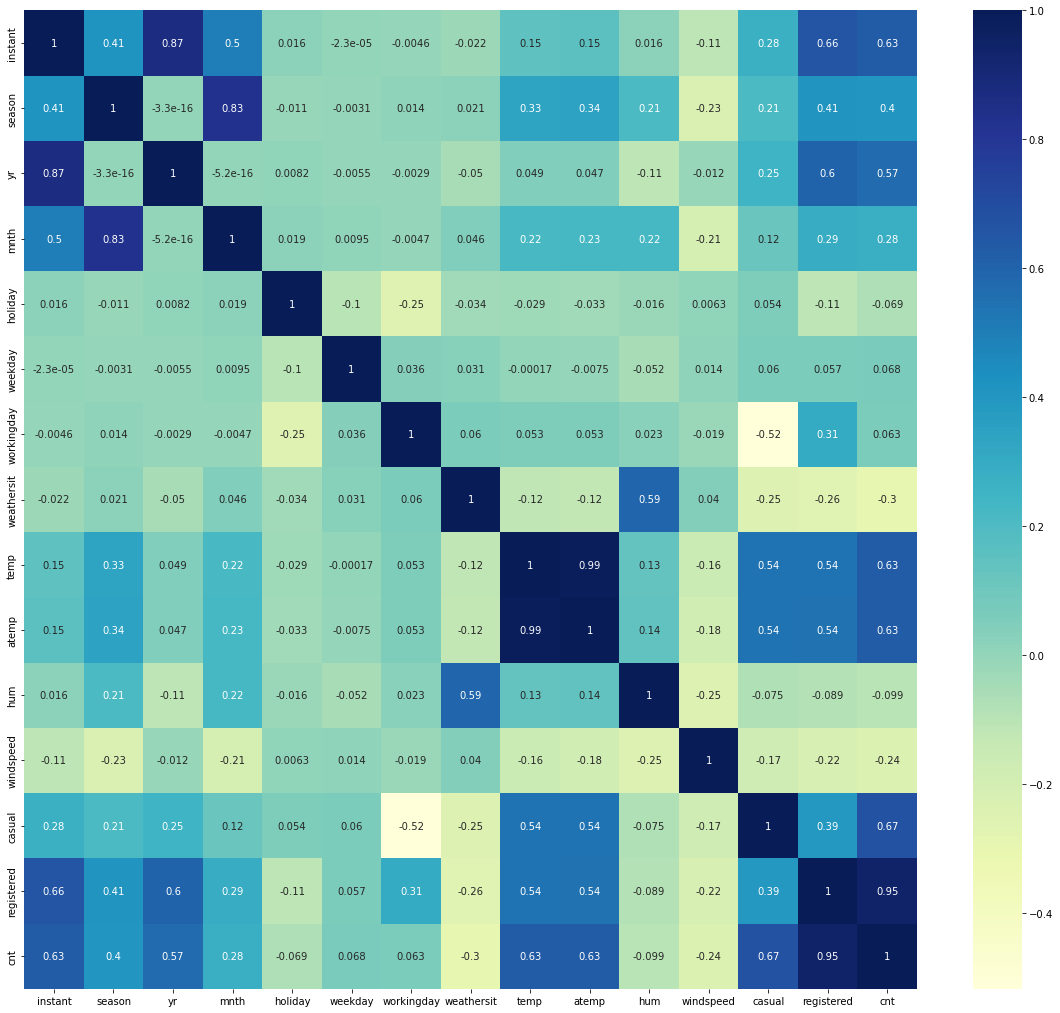

In [57]:
# Visualise Correlation using heat map

plt.figure(figsize=(20,18))
sns.heatmap(data=bike.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [58]:
# Fixing Rows and Columns - Multiple Columns are not useful for Data analysis and can be removed like,
## instant - it's just a record index and doesn't provide any value add as we already have that info by .shape() and info() functions
## dteday - the date can also be explained by year, mnth, weekday columns so we can drop it and moveover it's not a time series
##           data so date is not important
## holiday - Holidays are covered as part of workingday column which includes weekend + holidays so we can drop holiday 

bike = bike.drop('instant', axis=1)
bike = bike.drop('dteday', axis=1)
bike = bike.drop('holiday', axis=1)

## looking into the temp V/s atemp (feel like temp): we don't need both as temp shows air temperation outside whereas 
###        atemp (feel like temp) calculates wind or the humidity combined with the air temperature and actually how it feels 
###        like on our skin. 
### based on the pairplot and heatmap , it's clear that atemp and temp are highly correlated .
### So,one of them can be dropped . May need to drop "atemp" as feel like temperature tolerance may be different for diff people
### moreover as we are keeping Humidity and Windspeed parameters it make sense to include temp.
bike = bike.drop('atemp', axis=1)

## Casual and Registered V/s cnt -  Basically Casual + Registered = cnt now looking at the pairplots of 
###        Causal and Registered V/s cnt , correlation seems to be a sum of causual V/s cnt and Regsitered V/s cnt 
###         So it's better to drop Causual and Registed as cnt is our Target Variable
bike = bike.drop('casual', axis=1)
bike = bike.drop('registered', axis=1)

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


# Convert the Numerical values of season, weathersit, mnth and weekday variables to Categorical variables 

In [59]:
# season column has numbers which might indicate an order but actually it's not .
# it represents seasons as 1:spring, 2:summer, 3:fall, 4:winter
# So, it better we replace the numbers with proper strings

varlist = ['season']

bike[varlist] = bike[varlist].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,3,1,1,9.305237,43.6957,12.522300,1600


In [60]:
# Covnert the numerical values associated with labels to categorical string values
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy ==> CLEAR
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ==> MISTY 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ==> WET
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  ==> SNOW

varlist = ['weathersit']

bike[varlist] = bike[varlist].apply(lambda x: x.map({1:'clear', 2:'misty', 3:'wet', 4:'snow'}))
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,6,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,1,1,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,2,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,3,1,clear,9.305237,43.6957,12.522300,1600


In [61]:
# Convert the numerical values in "mnt" column to the Categorical variables
varlist = ['mnth']

bike[varlist] = bike[varlist].apply(lambda x: x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep',10:'oct', 11:'nov', 12: 'dec'}))
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,6,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,1,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,2,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,3,1,clear,9.305237,43.6957,12.522300,1600


In [62]:
# Convert the numerical values in "weekday" column to the Categorical variables
# 0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'

varlist = ['weekday']

bike[varlist] = bike[varlist].apply(lambda x: x.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}))
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,sat,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,sun,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,wed,1,clear,9.305237,43.6957,12.522300,1600


In [63]:
# dump bikw.info to check # of categorical and numerical variables

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 57.2+ KB


<Figure size 1440x1080 with 0 Axes>

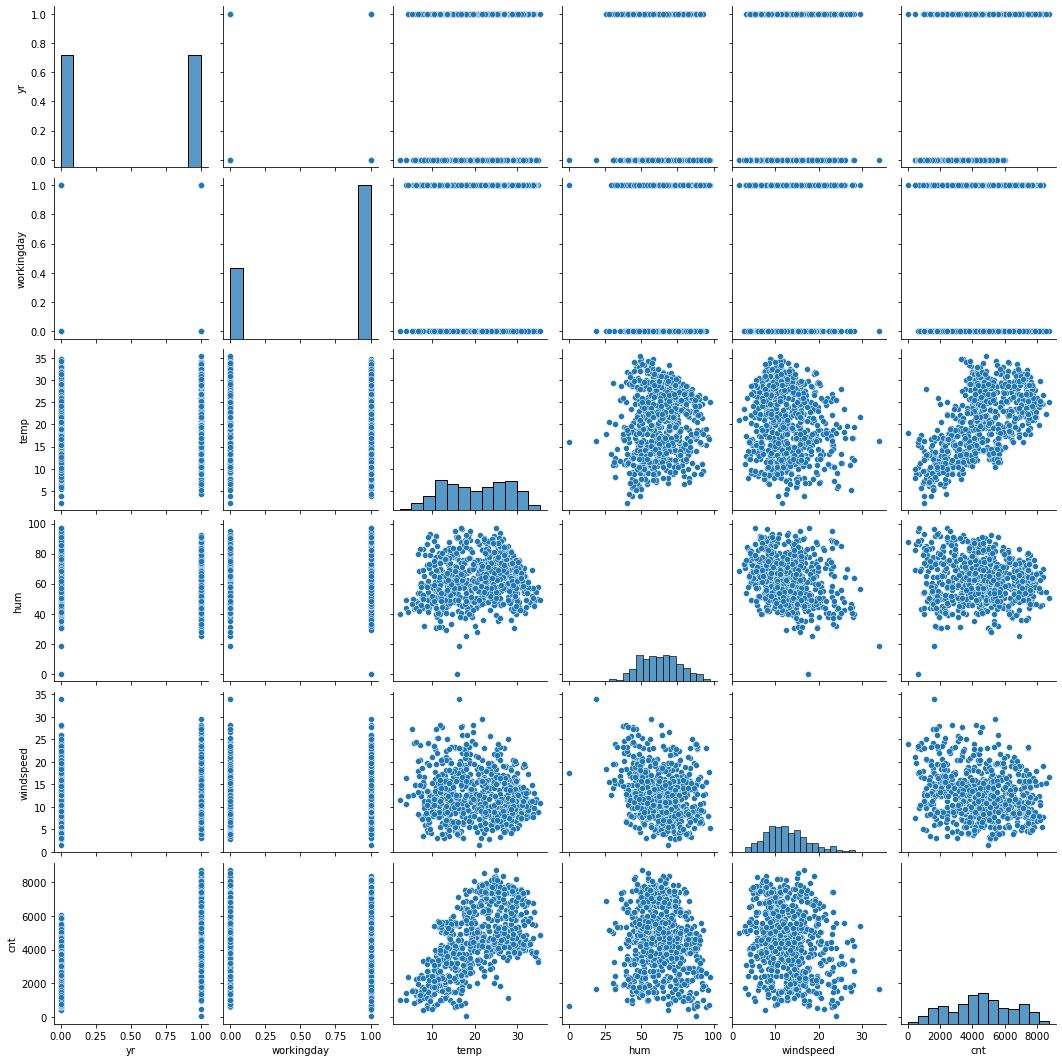

In [64]:
# Visualisation of the data to check linearity

plt.figure(figsize=(20,15))
sns.pairplot(data=bike)
plt.show()

# Summary : 
# linearity pattern observed for "atemp" and "cnt"

# Let's also look at correlation numbers

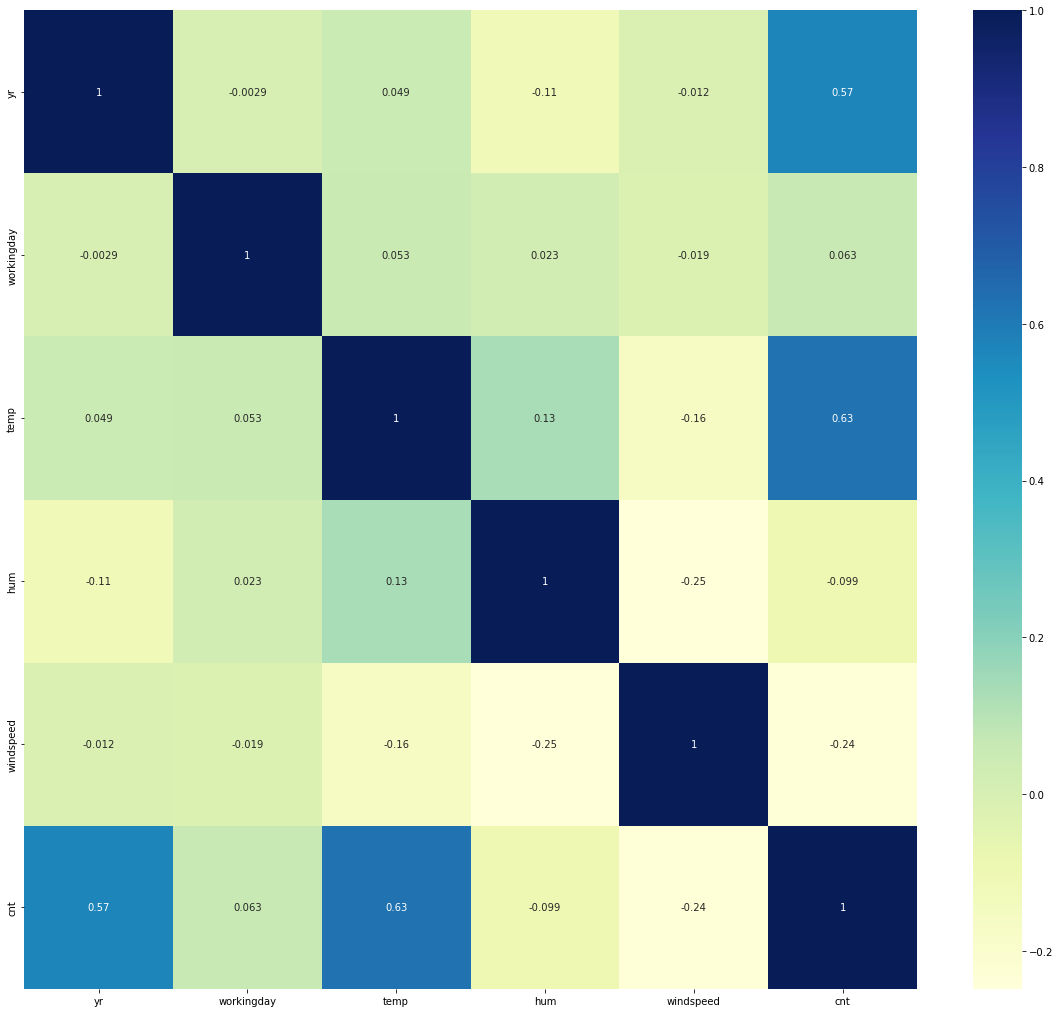

In [65]:
# Visualise Correlation using heat map

plt.figure(figsize=(20,18))
sns.heatmap(data=bike.corr(), annot=True, cmap="YlGnBu")

plt.show()

# Summary : 
# High correlation b/w temp and cnt


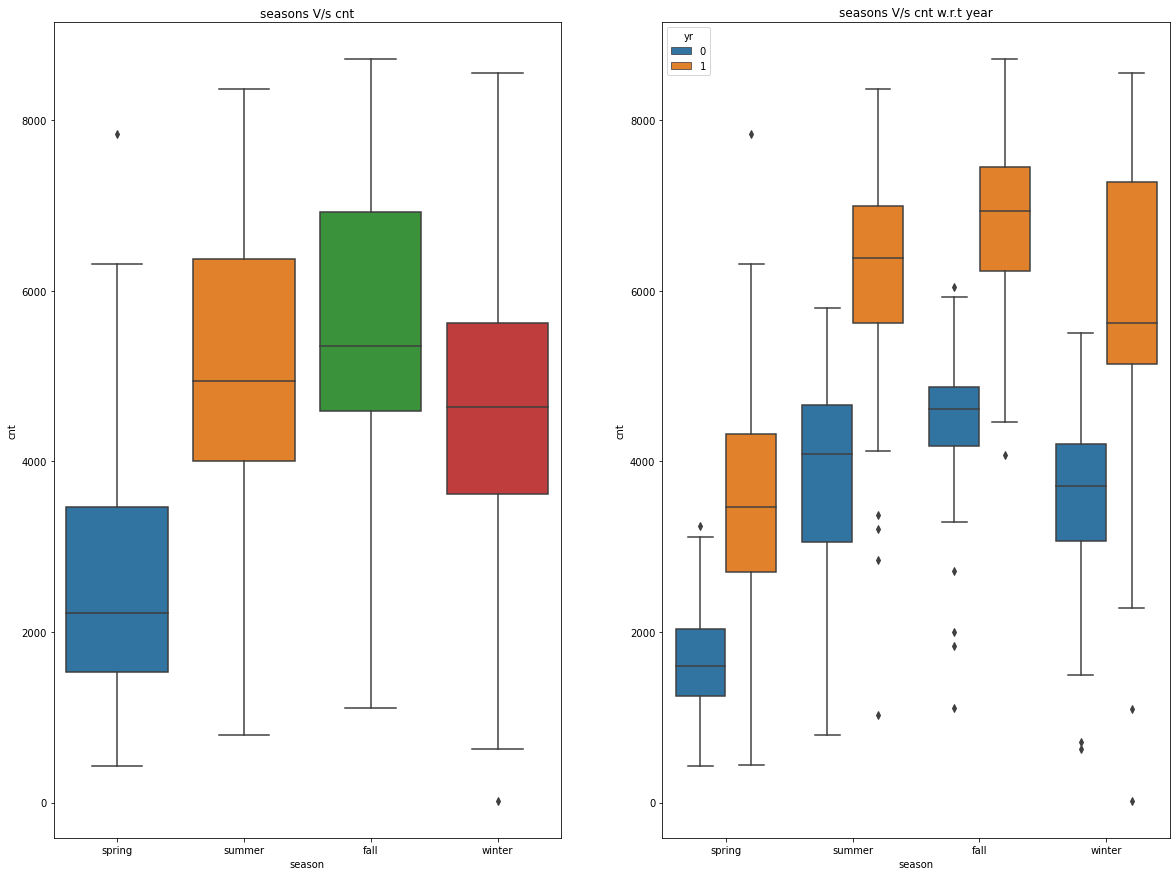

In [66]:
# Visualization of Categorical data using boxplot for seasons V/s cnt and seasons V/s cnt w.r.t yr

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.title('seasons V/s cnt')

plt.subplot(1,2,2)
sns.boxplot(x='season', y='cnt', hue='yr', data=bike)
plt.title('seasons V/s cnt w.r.t year')
plt.show()


# Summary 
# seasons V/s cnt - Summary
# bike demand is high in summer and fall
# Demand for bike in spring is less and this doesn't sum-up as it should be high due to favourable weather conditions
# To understand spring demand behaviour we plot seasons V/s cnt w.r.t year as below.

# seasons V/s cnt w.r.t year - Summary 
## Shows that in 2018-Spring the cnt (due casual + registered) was less and it gradually increased
## from 2018-summer onwards and the mean has gone Higher in 2019-spring to winter Year-on-Year

# Summary relevance -
## This boxplot only shows how the cnt got increased right from the 2018 till end of 2019 and after that Covid Happened 
## now, once covid is over and during path-to-recovery, company already has registered customers and initial demand pattern may follow
## similar pattern that as shown below as first Q1 may see less demand BUT demand will definitely increase as Covid situation 
## stablizes 



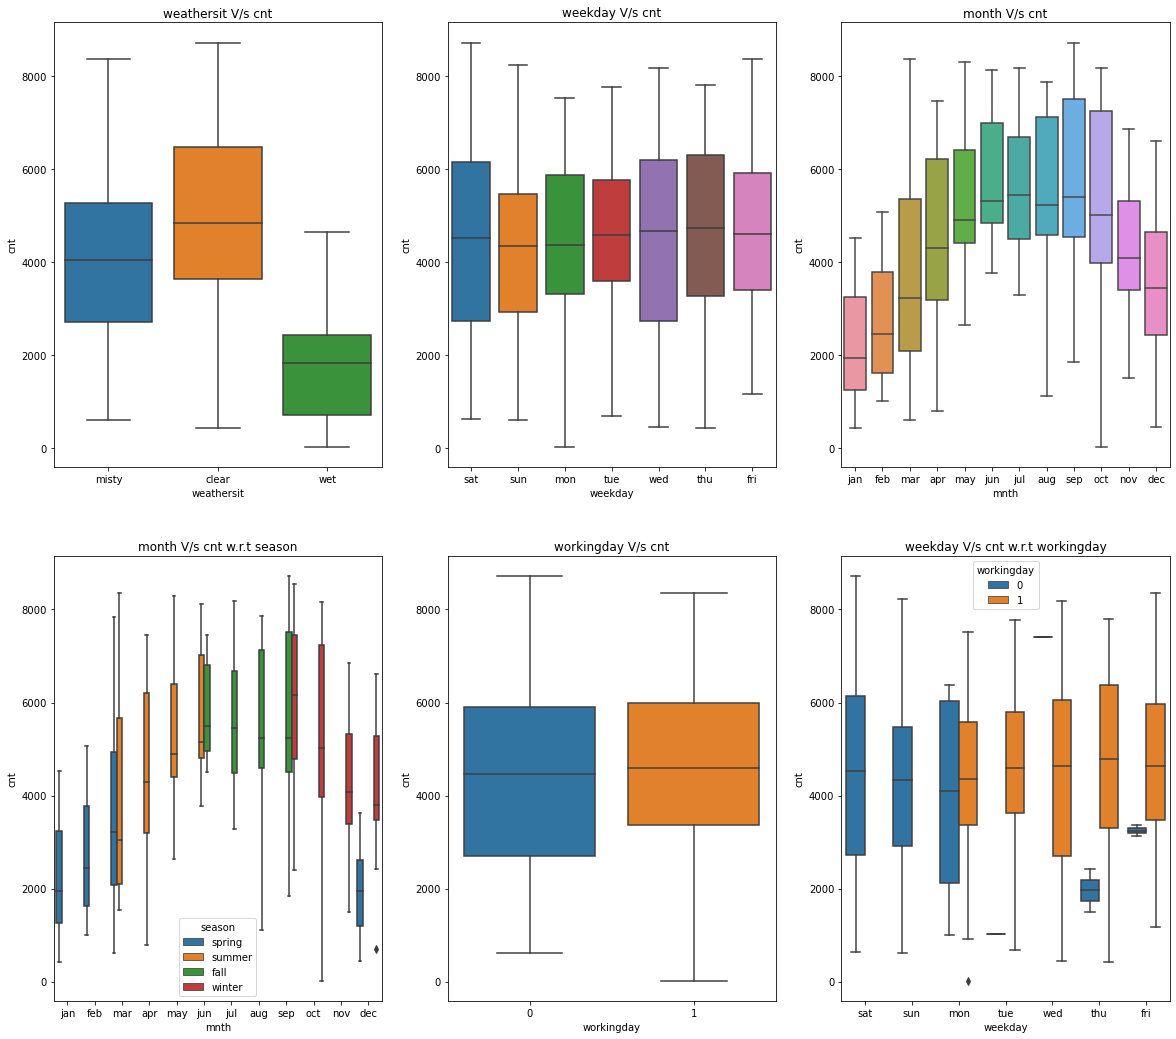

In [67]:
# Visualization of Categorical data using boxplot for weathersit V/s cnt 

plt.figure(figsize=(20,18))
plt.subplot(2,3,1)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.title('weathersit V/s cnt')

plt.subplot(2,3,2)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.title('weekday V/s cnt')

plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.title('month V/s cnt')

plt.subplot(2,3,4)
sns.boxplot(x='mnth', y='cnt', hue='season', data=bike)
plt.title('month V/s cnt w.r.t season')

plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.title('workingday V/s cnt')

plt.subplot(2,3,6)
sns.boxplot(x='weekday', y='cnt', hue='workingday', data=bike)
plt.title('weekday V/s cnt w.r.t workingday')

#plt.savefig("categorical.pdf", dpi=300, bbox_inches='tight')

plt.show()

# Summary

# Weathersit V/s cnt - Summary
## To start with, we only see 3 categorical variables (misty, clear and wet) BUT don't see snow variable at all .
## Secondly, the mean cnt is high with clear > misty > wet > snow (0)

# Weekday V/s cnt - Summary
## Mean is almost similar for all days .i.e. on average bike demand on all days are similar
## 75% quartile is higher in Saturday

# Month V/s Cnt - Summary
## Bike demand is high - may to oct 

# workingday V/s cnt - Summary
## Mean bike demand cnt is similar for working (1) and holiday (0)

# weekday V/s cnt w.r.t working day- Summary
## Again, Mean Bike demand cnt is similar for weekday V/s cnt considering the working day .i.e. holidays and working day 

# Summary of above graphs

# Weathersit V/s cnt - Summary
To start with, we only see 3 categorical variables (misty, clear and wet) BUT don't see snow variable at all .
Secondly, the mean cnt is high with clear > misty > wet > snow (0)

# Weekday V/s cnt - Summary
Mean is almost similar for all days .i.e. on average bike demand on all days are similar
75% quartile is higher in Saturday

# Month V/s Cnt - Summary
Bike demand is high - may to oct 

# workingday V/s cnt - Summary
Mean bike demand cnt is similar for working (1) and holiday (0)

# weekday V/s cnt w.r.t working day- Summary
Again, Mean Bike demand cnt is similar for weekday V/s cnt considering the working day .i.e. holidays and working day 

# Step2 : Data preparation

In [68]:
# dump info () 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 57.2+ KB


# Step 2.1 - Create dummy Variables for categorical data
# season, weathersit, mnt, weekday

In [69]:
# Create dummy Variables for season  categorical data
seasonstatus = pd.get_dummies(bike['season'], drop_first=True)
seasonstatus

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [70]:
# Concat the dummy variables of season - spring (100), summer (010), winter (001) and fall(000) 
# Then, Drop the season variable as dummy variables are added 

bike = pd.concat([bike, seasonstatus], axis=1)
bike = bike.drop('season', axis=1)

bike.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,sat,0,misty,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,sun,0,misty,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [71]:
# Create dummy variables for weathersit  categorical data

# Please note that although there are 4 defined categorical values BUT in the dataset there is only 3 used .
# So, although only 3 categorical value is used instead of 4 , we still use drop_first=True as in future there might be an 
# entry with 4th value (Snow)

weathersitstatus = pd.get_dummies(bike['weathersit'], drop_first=True)
weathersitstatus

### So, misty - 010, clear - 100 , wet - 001 and snow - 000 (snow is not present in dataset)

,misty,wet
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [72]:
# Concat the dummy variables of misty - 010, clear - 100 , wet - 001 and snow - 000 (snow is not present in dataset)
# Then, Drop the weathersit variable as dummy variables are added 

bike = pd.concat([bike, weathersitstatus], axis=1)
bike = bike.drop('weathersit', axis=1)

bike.head()


,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,misty,wet
0,0,jan,sat,0,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,0,jan,sun,0,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,0,jan,mon,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,jan,tue,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,jan,wed,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [73]:
# Create dummy variables for mnth categorical data
mnthstatus = pd.get_dummies(bike['mnth'],drop_first=True)
mnthstatus


,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [74]:
# Concat to bike dataset and then drop mnth
bike = pd.concat([bike, mnthstatus], axis=1)
bike = bike.drop('mnth', axis=1)

bike.head()


,yr,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,sat,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,sun,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,mon,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,tue,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,wed,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# Create dummy variables for weekday categorical data
weekdstatus = pd.get_dummies(bike['weekday'], drop_first=True)
weekdstatus

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [76]:
# Concat to bike dataset and then drop weekday
bike = pd.concat([bike, weekdstatus], axis=1)
bike = bike.drop('weekday', axis=1)

bike.head()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Post processing, data correlation using heatmap

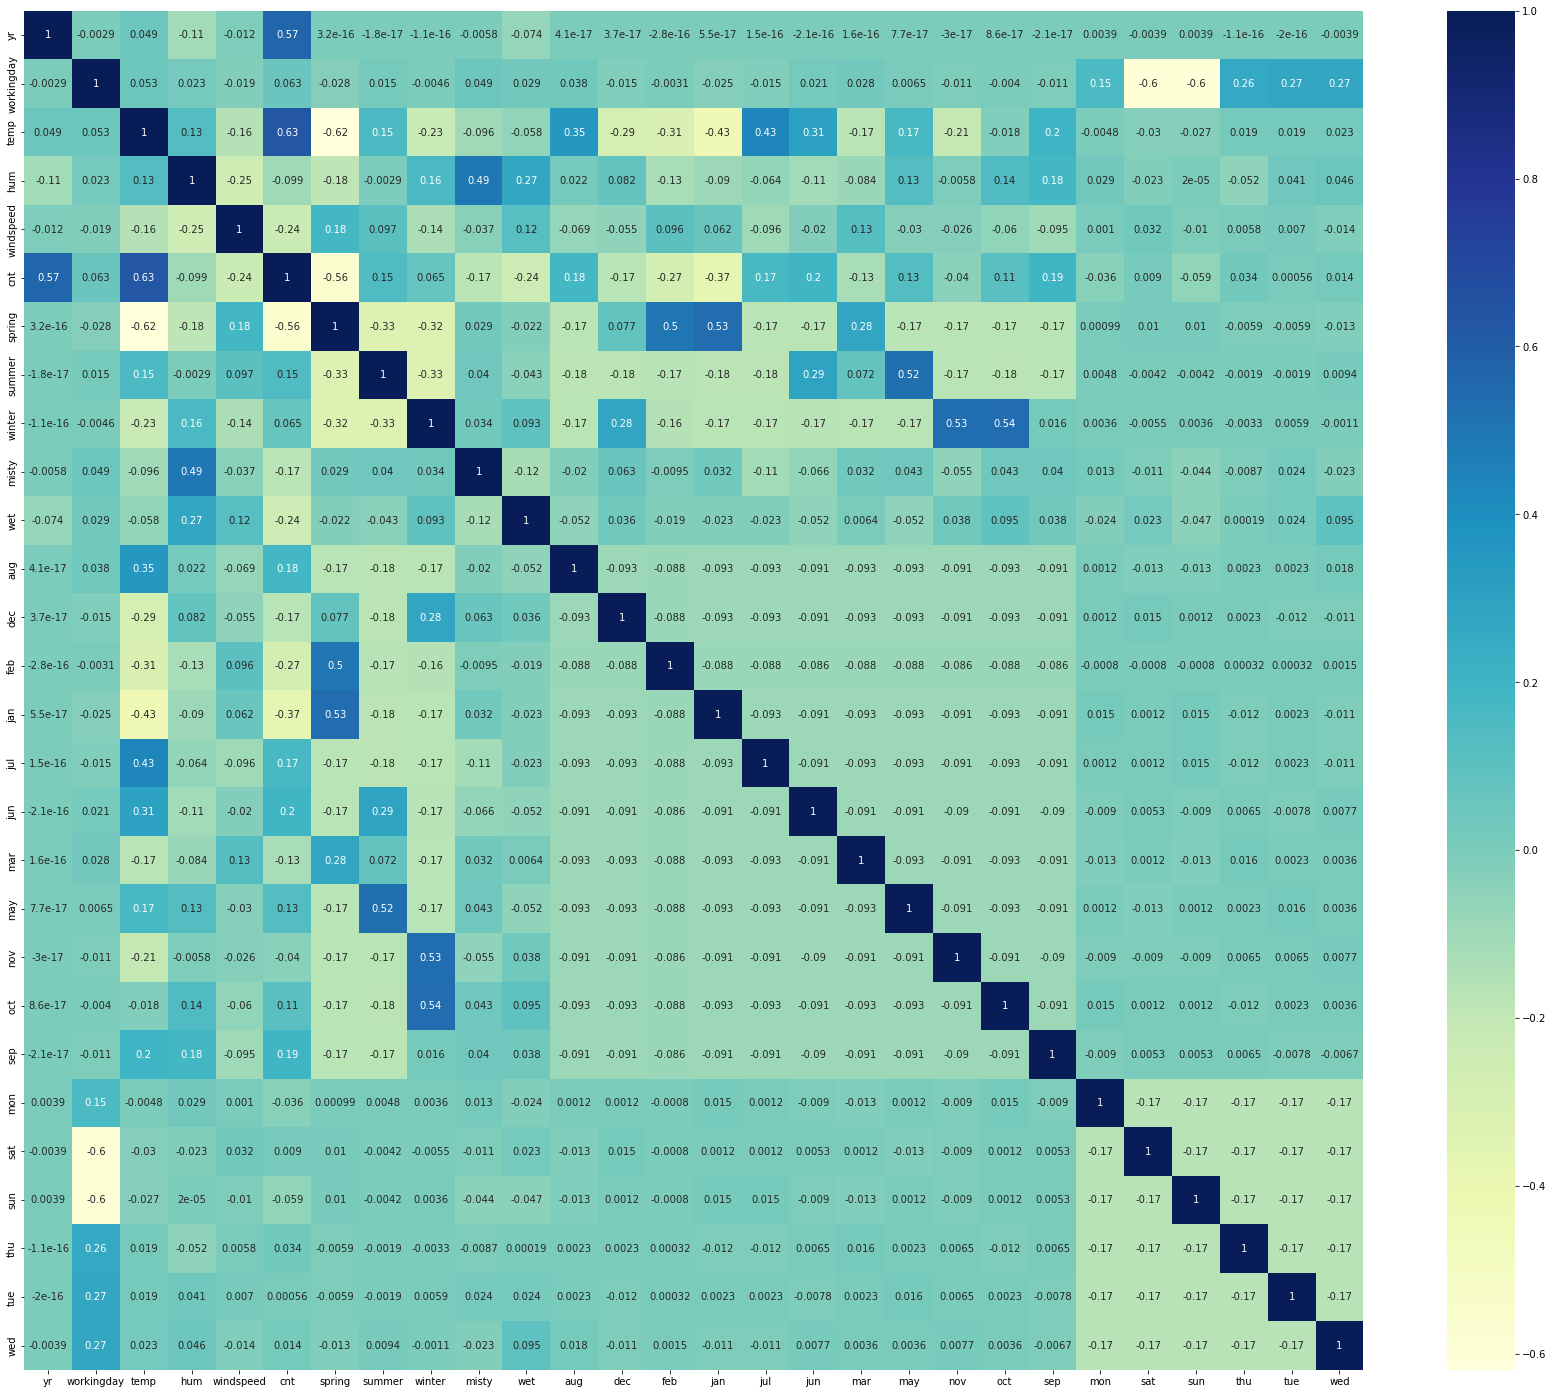

In [77]:
# Post processing check again the data correlation using heatmap for FULL DATASET BIKE

plt.figure(figsize=(30,25))
sns.heatmap(bike.corr(), annot=True, cmap ="YlGnBu")
plt.show()

# Step 2.2 
# Splitting Train and test dataset  and rescale the variables

In [78]:
# Split Train and test dataset

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)

# rescaling the numeric variables only 
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Initiate the scaler object 
scaler = MinMaxScaler()

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()


,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# post rescaling -  min and max are fitted with 0 and 1 range

bike_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.345098,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.475867,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


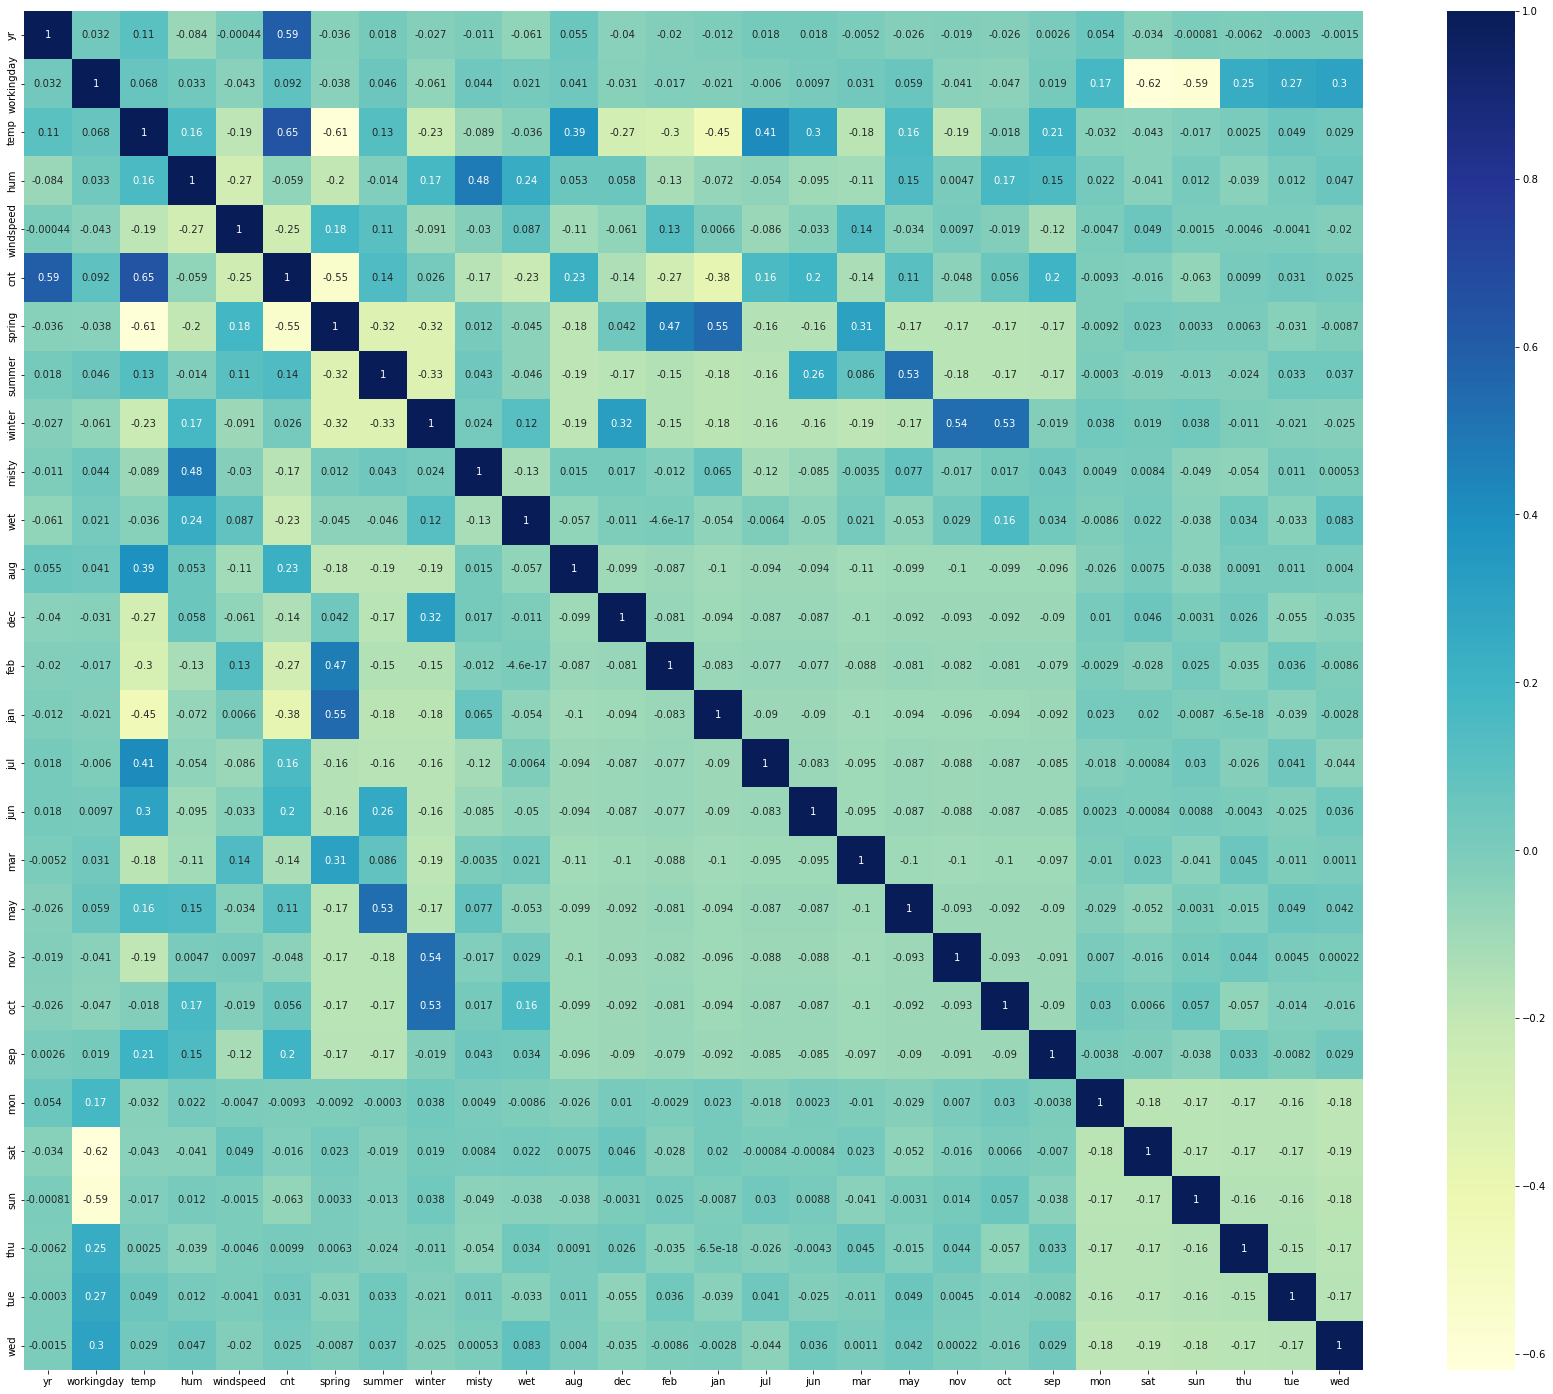

In [80]:
# Post processing check again the data correlation using heatmap for FULL TRAIN DATASET - bike_train

plt.figure(figsize=(30,25))
sns.heatmap(bike_train.corr(), annot=True, cmap ="YlGnBu")
plt.show()

# Step 2.3 Dividing into X and Y sets for Model building 

## y_train = bike_train without "cnt"
## X_train = bike_train

In [81]:
# Dividing X and Y sets for Model building

y_train = bike_train.pop('cnt')
X_train = bike_train

# Step 3 - Building Linear Regression Model and Evaluation
## p-value should be less than 0.05
## VIF value should be less than 5

In [82]:
bike_train.shape

(510, 27)

# Step 3.1 - Let's find out the N features which are better fit using RFE method

Tried with N= 20, 15, 12, 10

Best possible combination of variables with meeting the criteria of p-value < 0.05 and VIF < 5 was meet with N = 12 

In [83]:
# Run RFE with N = 15

bike_lm = LinearRegression()
bike_lm.fit(X_train, y_train)

rfe = RFE(bike_lm, 12)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', False, 2),
 ('misty', True, 1),
 ('wet', True, 1),
 ('aug', False, 9),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 16),
 ('may', False, 8),
 ('nov', False, 5),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 11),
 ('wed', False, 13)]

In [84]:
bike_train_col = X_train.columns[rfe.support_]
bike_train_col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'misty',
       'wet', 'jul', 'sep', 'sat', 'sun'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may',
       'nov', 'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

# Step 3.2 - Build Models using statsmodel using RFE variables

In [86]:
# Creating bike_train_rfe based on bike_train_col variables

X_train_rfe = X_train[bike_train_col]
X_train_rfe

,yr,workingday,temp,hum,windspeed,spring,misty,wet,jul,sep,sat,sun
576,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,1,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,1,0
79,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0


# Model 1 - Add constanst to train set and create a OLS model with all RFE recommended Variables


In [87]:
X_train_sm = sm.add_constant(X_train_rfe)

bike_lm1 = sm.OLS(y_train, X_train_sm)
bike_lm1_model = bike_lm1.fit()

print(bike_lm1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.40e-186
Time:                        20:37:12   Log-Likelihood:                 500.58
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     497   BIC:                            -920.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2898      0.039      7.484      0.0

In [88]:
# Calculate the VIF values

vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending  = False)

vif

,Features,VIF
3,hum,24.17
1,workingday,16.44
2,temp,13.03
4,windspeed,4.50
10,sat,4.43
11,sun,4.33
6,misty,2.18
0,yr,2.06
5,spring,1.97
8,jul,1.40


# Model 2 - Drop 'sun' with p-value 0.051
# Rebuild the model and VIF values

In [89]:
X = X_train_rfe.drop('sun', axis=1)

X_train_sm = sm.add_constant(X)

bike_lm1 = sm.OLS(y_train, X_train_sm)
bike_lm1_model = bike_lm1.fit()

print(bike_lm1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          6.02e-187
Time:                        20:37:12   Log-Likelihood:                 498.62
No. Observations:                 510   AIC:                            -973.2
Df Residuals:                     498   BIC:                            -922.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3347      0.031     10.709      0.0

In [90]:
# Rebuild VIF

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending  = False)

vif

,Features,VIF
3,hum,16.01
2,temp,12.35
1,workingday,4.62
4,windspeed,4.06
6,misty,2.11
0,yr,2.04
5,spring,1.88
10,sat,1.81
8,jul,1.40
7,wet,1.20


# Model 3 - All the p-values are < 0.05 and actually 0.00 now looking into VIF hum has high multicolinearity so drop 'hum'
# Rebuild the model and VIF values

In [91]:
# Model 3

X = X.drop('hum', axis=1)

X_train_sm = sm.add_constant(X)

bike_lm1 = sm.OLS(y_train, X_train_sm)
bike_lm1_model = bike_lm1.fit()

print(bike_lm1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.75e-186
Time:                        20:37:12   Log-Likelihood:                 493.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     499   BIC:                            -919.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2619      0.020     12.834      0.0

In [92]:
# Rebuild VIF

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending  = False)

vif

,Features,VIF
2,temp,6.50
1,workingday,4.30
3,windspeed,3.99
0,yr,2.04
9,sat,1.74
4,spring,1.63
5,misty,1.53
7,jul,1.34
8,sep,1.20
6,wet,1.07


# Model 4 - All the p-values are < 0.05 and actually 0.00 now looking into VIF values, although temp is higher but would keep temp and and drop 'workingday' instead based on the boxplot analysis above and summary as below,
# workingday V/s cnt - Summary
## Mean bike demand cnt is similar for working (1) and holiday (0)
# weekday V/s cnt w.r.t workingday- Summary
## Again, Mean Bike demand cnt is similar for weekday V/s cnt considering the working day .i.e. holidays and working day

# Rebuild the model and VIF values

In [93]:
X = X.drop('workingday', axis=1)

X_train_sm = sm.add_constant(X)

bike_lm1 = sm.OLS(y_train, X_train_sm)
bike_lm1_model = bike_lm1.fit()

print(bike_lm1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.84e-183
Time:                        20:37:12   Log-Likelihood:                 483.46
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     500   BIC:                            -904.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2981      0.019     15.552      0.0

In [94]:
# Rebuild VIF

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending  = False)

vif

,Features,VIF
1,temp,4.64
2,windspeed,3.85
0,yr,2.03
3,spring,1.52
4,misty,1.49
6,jul,1.33
7,sep,1.20
8,sat,1.18
5,wet,1.06


# Summary of Model Training
1. All the p-values < 0.05
2. VIF values are < 5

Model4 is the Final Model with R-squared on 0.825

Variables impacting the prediction - temp, windspeed, yr, spring, misty, jul, sep, sat, wet 

# Now, let's check the Residual Analysis on Train Set

# Step 3.3 :  Residual Analysis on Train Set

Text(0.5, 1.0, 'Residual Analysis')

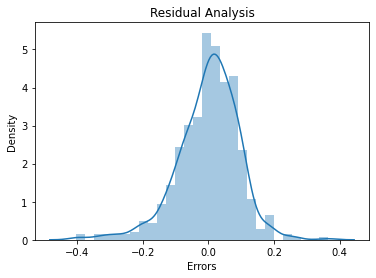

In [95]:
# using bike_lm1_model predict the y_train_pred 

y_train_pred = bike_lm1_model.predict(X_train_sm)

res = y_train - y_train_pred

sns.distplot(res)
plt.xlabel('Errors')  
plt.title('Residual Analysis')  

# Summary of Residual Analysis

Residual is normally distributed with mean as 0 and this meets the Linear Regression assumptions

Text(0, 0.5, 'y_train_pred')

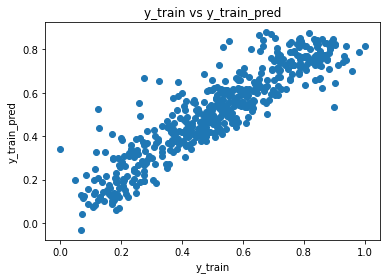

In [96]:
# Model Evaluation with bike_train dataset

plt.scatter(y_train, y_train_pred)

plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')  
plt.ylabel('y_train_pred')

# Step 3.4 : Prediction using Final Model

Apply the scaling on the bike_test - test Dataset for numerical variables

In [97]:
# Apply the scaling on the bike_test - test Dataset for numerical variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

bike_test.head()


,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Create y_test and X_test - X and y variables

In [98]:
# Create y_test and X_test - X and y variables

y_test = bike_test.pop('cnt')
X_test = bike_test

Creating X_test to include the final list of variables used from Train set which was generated from RFE and pruned later to optimise the model

In [99]:
# Creating X_test to include the final list of variables used for Train set which was generated from RFE and pruned later to
# optimise the model

test_col = X_train_sm.columns

# Exclude the const variable do used [1:]
X_test_rfe = X_test[test_col[1:]]
X_test_sm = sm.add_constant(X_test_rfe)

X_test_sm.head()


,const,yr,temp,windspeed,spring,misty,wet,jul,sep,sat
184,1.0,0,0.831783,0.084219,0,1,0,1,0,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0


In [100]:
# Making the predictions using the final model

y_test_pred = bike_lm1_model.predict(X_test_sm)

Model Evaluation with bike_test dataset and Scatter plot of y_pred and y_test_pred

Text(0, 0.5, 'y_test_pred')

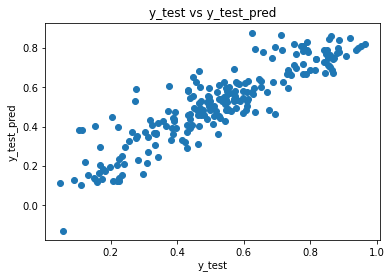

In [101]:
# Model Evaluation with bike_test dataset

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')     

# Print the r2_score of Test dataset 

r2_score of Train Dataset is 0.825 and adjusted r2_score is 0.822

r2_score of Test Datset is 0.801 which is close to Train Dataset 0.825 so we have decent Model

In [102]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8013755875983753

# Model Summary w.r.t Bussiness Goals 

r2_score of Test Datset is 0.801 which is close to Train Dataset 0.825 so we have decent Model

1. Which variables are significant in predicting the demand for shared bikes ?
-Based on Model analysis, below variables are significant . Some variables will impact in positive way while some other will have negative impact . Pattern is impact is described by coeffiecnt values.
- Temp
- Windspeed
- yr
- spring
- misty
- jul
- sep
- sat
- wet

2.How well those variables describe the bike demands ?
- The equation of the best fit line which also describes the impact of each variable is,

cnt = 0.2981 (const) + 0.236 * yr + 0.397 * temp - 0.153 * windspeed - 0.145 * spring - 0.079 * misty - 0.275 * wet - 0.073 * jul + 0.052 * sep + 0.023 * sat 

Basically this means

- Bike demand is impacted positively with below variables,
    - yr - As it is a new concept, YoY there seems to be an increase and can fairly assume higher demands in current year.
    - temp - increases with slight higher temps in US so may be launched in cities which has acceptable temps throughout the year .
    - Bike Demand is slightly higher in Sep Month and during Saturday in a week .

- Bike Demand is impactyed negatively with below variables
    - Bike Demand is less during high wind speed .
    - Bike Demand is less in Spring : This may be due to the Dataset as we saw in Boxplot that during Spring time the Demand curve slowly increased from first half to Second half . Please refer to Box plot - seasons V/s cnt w.r.t year
    - Bike Demand is less in Misty and Wet weather conditions basically about to rain or rainy sessions 